In [1]:
#####################################################################################################################################################################
# xView2                                                                                                                                                            #
# Copyright 2019 Carnegie Mellon University.                                                                                                                        #
# NO WARRANTY. THIS CARNEGIE MELLON UNIVERSITY AND SOFTWARE ENGINEERING INSTITUTE MATERIAL IS FURNISHED ON AN "AS-IS" BASIS. CARNEGIE MELLON UNIVERSITY MAKES NO    #
# WARRANTIES OF ANY KIND, EITHER EXPRESSED OR IMPLIED, AS TO ANY MATTER INCLUDING, BUT NOT LIMITED TO, WARRANTY OF FITNESS FOR PURPOSE OR MERCHANTABILITY,          # 
# EXCLUSIVITY, OR RESULTS OBTAINED FROM USE OF THE MATERIAL. CARNEGIE MELLON UNIVERSITY DOES NOT MAKE ANY WARRANTY OF ANY KIND WITH RESPECT TO FREEDOM FROM PATENT, # 
# TRADEMARK, OR COPYRIGHT INFRINGEMENT.                                                                                                                             #
# Released under a MIT (SEI)-style license, please see LICENSE.md or contact permission@sei.cmu.edu for full terms.                                                 #
# [DISTRIBUTION STATEMENT A] This material has been approved for public release and unlimited distribution.  Please see Copyright notice for non-US Government use  #
# and distribution.                                                                                                                                                 #
# This Software includes and/or makes use of the following Third-Party Software subject to its own license:                                                         #
# 1. SpaceNet (https://github.com/motokimura/spacenet_building_detection/blob/master/LICENSE) Copyright 2017 Motoki Kimura.                                         #
# DM19-0988                                                                                                                                                         #
#####################################################################################################################################################################

In [2]:
# To Run this notebook, start at the first cell with the license information and click run 4 times to show 
# the field blocks, then input the *full path* to the label, and image. Finally, click "Create next input", 
# you'll then see a full sized image with labels overlaid, you will also get different color labels if the
# label file as damage labels under ['features']['xy'][i]['properties']['subtype'] where i is the polygon 
# in the ['xy'] list 

In [3]:
from ipywidgets import Layout
from IPython.display import Javascript, HTML
import ipywidgets as widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

path_to_label = widgets.Text(
    placeholder='Label path here',
    description='Label:',
    disabled=False,
    layout=Layout(width='100%')
)
path_to_image = widgets.Text(
    placeholder='Image path here',
    description='Image:',
    disabled=False,
    layout=Layout(width='100%')
)

ModuleNotFoundError: No module named 'ipywidgets'

In [4]:

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [5]:
display(path_to_label, path_to_image)
button = widgets.Button(description="Create next input")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

Text(value='/tmp/inference/inference.json', description='Label:', layout=Layout(width='100%'), placeholder='La…

Text(value='/Users/rthosfelt/Downloads/xBD/tuscaloosa-tornado/images/tuscaloosa-tornado_00000027_pre_disaster.…

Button(description='Create next input', style=ButtonStyle())

Text(value='', description='Label:', layout=Layout(width='100%'), placeholder='Label path here')

Text(value='', description='Image:', layout=Layout(width='100%'), placeholder='Image path here')

Button(description='Create next input', style=ButtonStyle())

In [6]:
import json 
from PIL import Image, ImageDraw
from IPython.display import display
from shapely import wkt
import os

In [25]:
# Opening and loading polygons from label json 
path_to_label_value = r"C:\Users\namacdon\Desktop\delete\xView2\train_images_labels_targets\disasters\hurricane-matthew\labels\hurricane-matthew_00000082_pre_disaster.json"
path_to_image_value = r"C:\Users\namacdon\Desktop\delete\xView2\train_images_labels_targets\disasters\hurricane-matthew\images\hurricane-matthew_00000082_pre_disaster.png"

with open(path_to_label_value) as image_json_file:
    image_json = json.load(image_json_file)

In [26]:
coords = image_json['features']['xy']
wkt_polygons = []

for coord in coords:
    if 'subtype' in coord['properties']:
        damage = coord['properties']['subtype']
    else:
        damage = 'no-damage'
    wkt_polygons.append((damage, coord['wkt']))
    
polygons = []

for damage, swkt in wkt_polygons:
    polygons.append((damage, wkt.loads(swkt)))

In [27]:
# Loading image
img = Image.open(path_to_image_value)

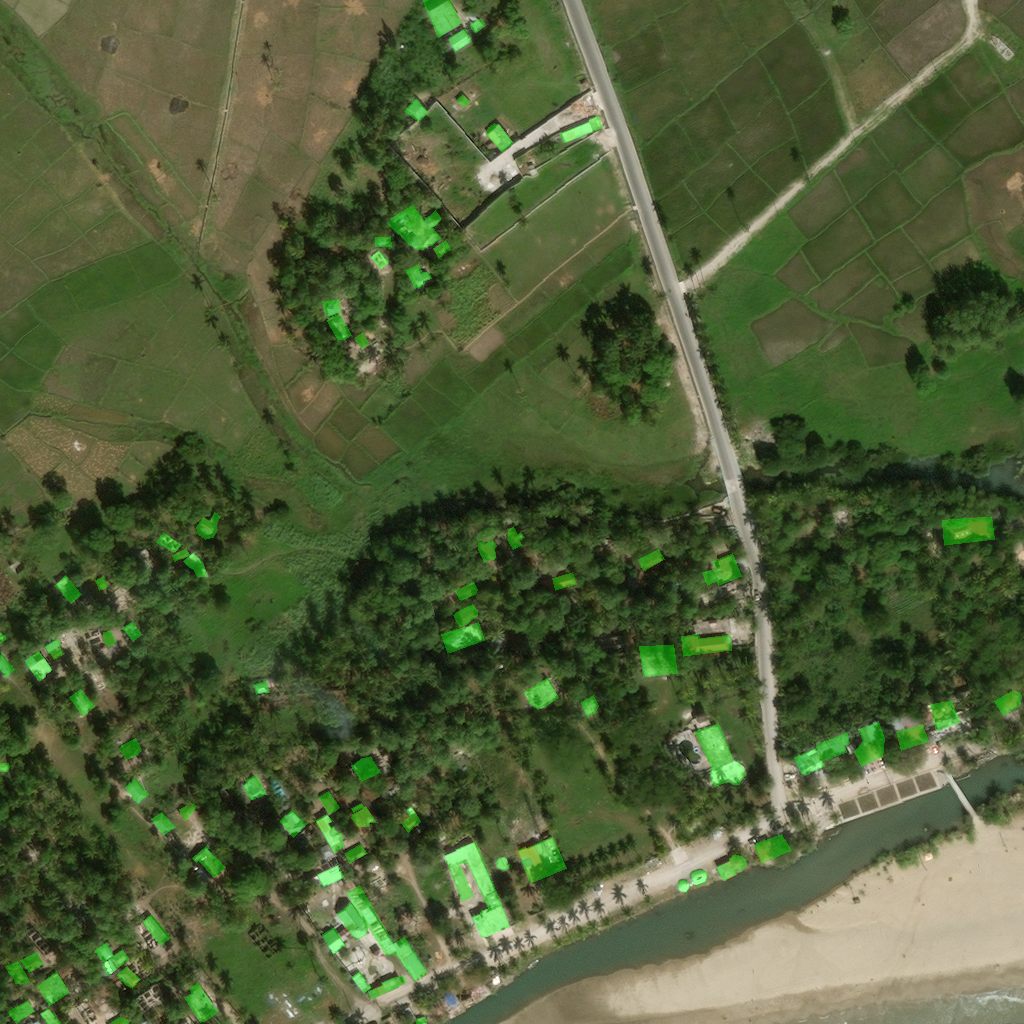

In [28]:
draw = ImageDraw.Draw(img, 'RGBA')

damage_dict = {
    "no-damage": (0, 255, 0, 100),
    "minor-damage": (0, 0, 255, 125),
    "major-damage": (255, 69, 0, 125),
    "destroyed": (255, 0, 0, 125),
    "un-classified": (255, 255, 255, 125)
}

for damage, polygon in polygons:
    x,y = polygon.exterior.coords.xy
    coords = list(zip(x,y))
    draw.polygon(coords, damage_dict[damage])

del draw

display(img)